In [3]:
# extracting the compresswd dataset
from zipfile import ZipFile
dataset='/content/dataset_face mask detection.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [10]:
!ls

 data  'dataset_face mask detection.zip'   sample_data


**importing** **dependencies**

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

**Analysing data**

In [12]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2209.jpg', 'with_mask_1544.jpg', 'with_mask_1718.jpg', 'with_mask_3236.jpg', 'with_mask_551.jpg']
['with_mask_709.jpg', 'with_mask_1876.jpg', 'with_mask_2874.jpg', 'with_mask_2087.jpg', 'with_mask_839.jpg']


In [13]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1271.jpg', 'without_mask_855.jpg', 'without_mask_826.jpg', 'without_mask_427.jpg', 'without_mask_1892.jpg']
['without_mask_749.jpg', 'without_mask_3425.jpg', 'without_mask_1879.jpg', 'without_mask_1824.jpg', 'without_mask_3406.jpg']


In [14]:
print('no. of with mask images',len(with_mask_files))
print('no. of without mask images',len(without_mask_files))

no. of with mask images 3725
no. of without mask images 3828


**creating labels for the two class of images**

with mask--> 1

without mask-->0

In [15]:
with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [16]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**displaying the images**

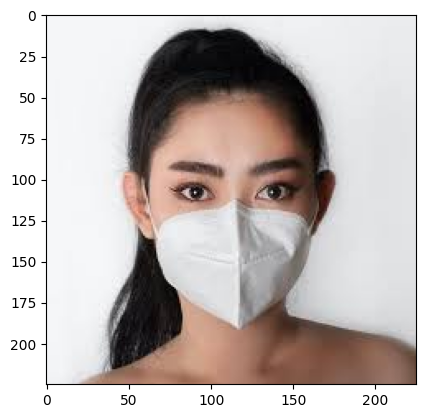

In [19]:
img=mpimg.imread('/content/data/with_mask/with_mask_2209.jpg')
imgplot=plt.imshow(img)
plt.show()

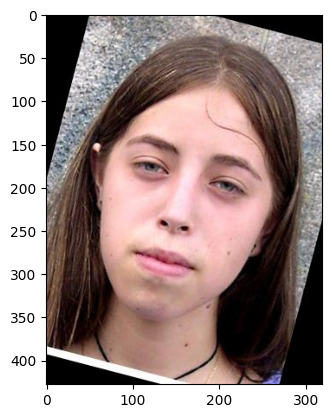

In [20]:
img=mpimg.imread('/content/data/without_mask/without_mask_1271.jpg')
imgplot=plt.imshow(img)
plt.show()

**1.Resize the images**

**2.Convert images into RGB**

**3.Convert the images into numpy arrays**

In [25]:
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [27]:
type(data)

list

In [28]:
len(data)

7553

array([[[245, 246, 248],
        [245, 246, 248],
        [245, 246, 248],
        ...,
        [235, 236, 238],
        [235, 236, 238],
        [235, 236, 238]],

       [[245, 246, 248],
        [245, 246, 248],
        [245, 246, 248],
        ...,
        [235, 236, 238],
        [235, 236, 238],
        [235, 236, 238]],

       [[245, 246, 248],
        [245, 246, 248],
        [245, 246, 248],
        ...,
        [235, 236, 238],
        [235, 236, 238],
        [235, 236, 238]],

       ...,

       [[242, 243, 245],
        [242, 243, 245],
        [242, 243, 245],
        ...,
        [124,  94,  80],
        [118,  89,  75],
        [113,  84,  70]],

       [[241, 242, 244],
        [241, 242, 244],
        [241, 242, 244],
        ...,
        [124,  95,  81],
        [119,  90,  76],
        [115,  85,  71]],

       [[240, 241, 243],
        [240, 241, 243],
        [240, 241, 243],
        ...,
        [126,  94,  81],
        [121,  89,  76],
        [117,  83,  71]]], dtype=uint8)
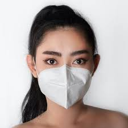

In [29]:
data[0]

**Converting image list and label list to numpy arrays**

In [30]:
X=np.array(data)
Y=np.array(labels)

In [31]:
type(X)

numpy.ndarray

In [32]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

**Scaling the data between 0 to 1 for better performance of model**

In [35]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

**Building a convolutional Neural Networks(CNN)**

In [36]:
import tensorflow as tf
from tensorflow import keras

In [43]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compling Neural Network**

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

**Training the neural network**

In [45]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - acc: 0.6609 - loss: 0.6780 - val_acc: 0.8744 - val_loss: 0.2820
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8823 - loss: 0.3019 - val_acc: 0.9058 - val_loss: 0.2288
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9117 - loss: 0.2321 - val_acc: 0.9041 - val_loss: 0.2182
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9135 - loss: 0.2180 - val_acc: 0.9008 - val_loss: 0.2515
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9389 - loss: 0.1545 - val_acc: 0.9140 - val_loss: 0.2174


**Model Evaluation**

In [46]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test accuracy=', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9352 - loss: 0.1988
Test accuracy= 0.93845134973526


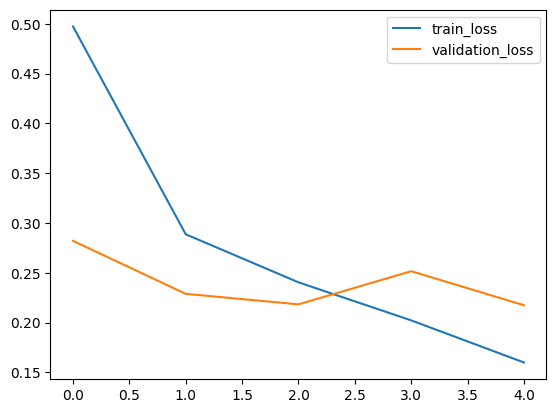

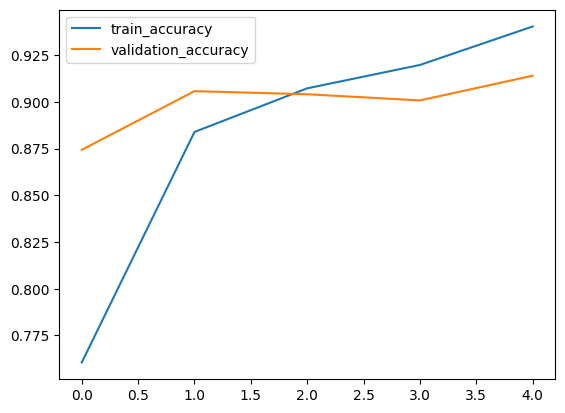

In [49]:
h=history

#plotting the loss value
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

#plotting the accuracy value
plt.plot(h.history['acc'],label='train_accuracy')
plt.plot(h.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.show()

**Predictive** **System**

path of the image to be predicted: /content/FACE_2.png


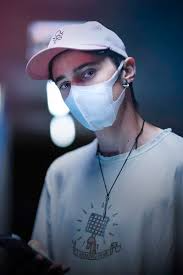

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.7409015  0.33840576]]
0
the person in the image is wearing a mask


In [75]:
input_image_path=input('path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction) # this has been done to convert predicting value into label value
print(input_pred_label)

if input_pred_label==0:
  print('the person in the image is wearing a mask')
else:
  print('the person in the image is not wearing a mask')


path of the image to be predicted: /content/FACE_6.png


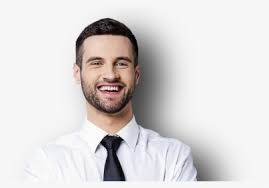

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.46205547 0.649956  ]]
1
the person in the image is not wearing a mask


In [74]:
input_image_path=input('path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction) # this has been done to convert predicting value into label value
print(input_pred_label)

if input_pred_label == 0:
  print('the person in the image is wearing a mask')
else:
  print('the person in the image is not wearing a mask')

**Creating a Function for detecting face mask**

In [76]:
def predict_mask(model):
    input_image_path = input('Path of the image to be predicted: ')
    input_image = cv2.imread(input_image_path)

    if input_image is None:
        print("Error: Could not read the image. Please check the path.")
        return

    cv2_imshow(input_image)

    # Preprocess the image
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    # Predict using the model
    input_prediction = model.predict(input_image_reshaped)
    print("Prediction Probabilities:", input_prediction)

    input_pred_label = np.argmax(input_prediction)  # Convert prediction value into label value
    print("Predicted Label:", input_pred_label)

    if input_pred_label == 0:
        print('The person in the image is wearing a mask.')
    else:
        print('The person in the image is not wearing a mask.')

Path of the image to be predicted: /content/FACE_5.png


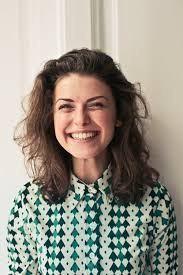

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction Probabilities: [[0.13046394 0.98431385]]
Predicted Label: 1
The person in the image is not wearing a mask.


In [78]:
predict_mask(model)